In [0]:
!pip install kaggle

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ishanjawade","key":"eb21143aef13181e635cfc956298dae9"}'}

In [0]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d grassknoted/asl-alphabet

 99% 1.01G/1.03G [00:17<00:00, 54.3MB/s]
100% 1.03G/1.03G [00:17<00:00, 61.4MB/s]


In [0]:
!unzip asl-alphabet.zip

Output hidden; open in https://colab.research.google.com to view.

In [0]:
!pip3  

In [0]:
!cd asl_alphabet_train/asl_alphabet_train/
!ls

asl_alphabet_test  asl_alphabet_train  asl-alphabet.zip  sample_data


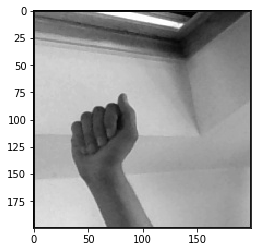

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt 
import os
import cv2
from tqdm import tqdm
DATADIR = "/content/asl_alphabet_train/asl_alphabet_train/"
CATEGORIES = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q' ,'R' , 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            plt.imshow(img_array , cmap="gray")
            plt.show()
            break
        break

In [0]:
print(img_array.shape)

(200, 200)


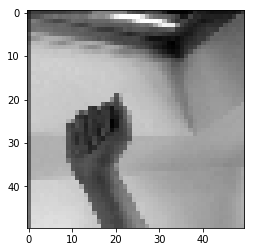

In [0]:
img_size = 50

new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [0]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in os.listdir(path):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (img_size, img_size)) # resize to normalize data size
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
                
create_training_data()

In [0]:
print(len(training_data))

87000


In [0]:
import random
random.shuffle(training_data)

In [0]:
X = []
y = []

for features, labels in training_data:
    X.append(features)
    y.append(labels)
    
X = np.array(X).reshape(-1, img_size, img_size, 1)

In [0]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [0]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [0]:
X[10]

array([[[ 49],
        [ 64],
        [ 64],
        ...,
        [ 55],
        [ 55],
        [ 58]],

       [[ 79],
        [124],
        [117],
        ...,
        [ 65],
        [ 62],
        [ 60]],

       [[100],
        [170],
        [168],
        ...,
        [ 76],
        [ 73],
        [ 73]],

       ...,

       [[ 82],
        [ 91],
        [ 53],
        ...,
        [106],
        [105],
        [105]],

       [[ 30],
        [ 32],
        [ 34],
        ...,
        [154],
        [109],
        [111]],

       [[ 26],
        [ 16],
        [ 15],
        ...,
        [216],
        [232],
        [237]]], dtype=uint8)

In [0]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.callbacks import TensorBoard
import pickle
#import time
#from tensorflow.keras.callbacks import ModelCheckpoint 

X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

X = X/255.0

model = Sequential()

model.add( Conv2D(64, (3, 3), input_shape = X.shape[1:]) )
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size =( 2, 2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(29))
model.add(Activation('softmax'))

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ['accuracy'])
#path = "/home/ishan/Desktop/DeepLearning/"
#callback_model = ModelCheckpoint(path, save_best_only=True, save_freq="epoch")

X = np.array(X)
y = np.array(y)

model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)

model.save("ASL_model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60899 samples, validate on 26101 samples
Epoch 1/3
60899/60899 [==============================] - 24s 395us/sample - loss: 0.9869 - acc: 0.7069 - val_loss: 0.2538 - val_acc: 0.9254
Epoch 2/3
60899/60899 [==============================] - 21s 343us/sample - loss: 0.1765 - acc: 0.9451 - val_loss: 0.1167 - val_acc: 0.9633
Epoch 3/3
60899/60899 [==============================] - 21s 342us/sample - loss: 0.1020 - acc: 0.9689 - val_loss: 0.0966 - val_acc: 0.9675


In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint
model = tf.keras.models.load_model('/content/ASL_model.pb')
callbacks = 'model.chkpt'
callbacks_chkpt = ModelCheckpoint(callbacks,save_weights_only=True,save_best_only=True,save_freq='epoch')

model.fit(X,y,batch_size=32,epochs=1,validation_split=0.3,callbacks=[callbacks_chkpt])




Train on 60899 samples, validate on 26101 samples
60899/60899 [==============================] - 22s 358us/sample - loss: 0.0779 - acc: 0.9779 - val_loss: 0.0509 - val_acc: 0.9851


In [0]:
img.shape

(1, 50, 50, 1)

In [0]:
pred = model.predict(img)

In [0]:
print(pred)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]


In [0]:
print(CATEGORIES[np.argmax(pred)])

F


In [0]:
model = tf.keras.models.load_model('/content/ASL_image_classifier')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
def Preprocess(img):
  img = cv2.imread(img,cv2.IMREAD_GRAYSCALE)

  img = cv2.resize(img,(50,50))

  img = np.reshape(img,(1,50,50,1))
  
  pred = model.predict(img)
  
  ans = CATEGORIES[np.argmax(pred)]
  
  return ans


In [0]:
img = "/N_test.jpg"
print(Preprocess(img))

N


In [0]:
model = tf.keras.models.load_model('/content/ASL_image_classifier')

img = "/content/P_test.jpg"

img = cv2.imread(img,cv2.IMREAD_GRAYSCALE)

img = img.astype(float)

img = cv2.resize(img,(50,50))

img = np.reshape(img,(1,50,50,1))

pred = model.predict(img)

ans = CATEGORIES[np.argmax(pred)]

print(ans)

P


In [0]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
filepath = ''
callbacks_chkpt = ModelCheckpoint(filepath,save_best=True,save_weights_only=True,save_freq='epoch')
model = tf.keras.models.load_model('/content/ASL_image_classifier')
model.fit(X, y, batch_size=32, epochs=1, validation_split=0.3, callbacks=[callbacks_chkpt])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


NameError: ignored

In [0]:
!

 16:30:21 up 9 min,  0 users,  load average: 0.00, 0.09, 0.08
USER     TTY      FROM             LOGIN@   IDLE   JCPU   PCPU WHAT
